# Automated Cell Type Marker Gene Scores

Isn't looking up marker genes for each cell type so slow-going? Let's have an LLM do it.

This notebook shows how to use AnnDictionary's functions to have LLMs provide marker genes for cell types (or any labels). To get cell type labels, see any of the other tutorial notebooks for annotation:
- With an LLM: [Notebook]() [Documentation]()
- With a Label Transfer Model: [Notebook]() [Documentation]()

We'll use a pre-labeled dataset for this tutorial.

In [1]:
import anndict as adt
import scanpy as sc

# Load an anndata
adata_with_labels = sc.datasets.pbmc3k_processed()

# We'll need all the genes for this
adata_with_enough_genes = sc.datasets.pbmc3k()

# Merge labels from adata_with_labels into adata_with_enough_genes
adata_with_enough_genes.obs['cell_type'] = adata_with_labels.obs['louvain'].reindex(adata_with_enough_genes.obs.index).values

# Remove unlabelled cells, the NaN category will make adt.cell_type_marker_gene_score fail()
adata_with_enough_genes = adata_with_enough_genes[adata_with_enough_genes.obs['cell_type'].notnull()]

adata = adata_with_enough_genes

In [2]:
# Configure LLM backend
adt.configure_llm_backend(provider='anthropic',
                          model='claude-3-5-sonnet-20240620',
                          api_key='my-anthropic-api-key',
                          requests_per_minute=100
                          )

In [3]:
adata

View of AnnData object with n_obs × n_vars = 2638 × 32738
    obs: 'cell_type'
    var: 'gene_ids'

In [ ]:
# Calculate Scores
adt.cell_type_marker_gene_score(adata, cell_type_col='cell_type', species='Human', list_length="longer")

In [11]:
# Note, you can see which genes went into each module score by looking at adata.var
adata.var

,gene_ids,CD4 T cells_score,B cells_score,CD14+ Monocytes_score,NK cells_score,CD8 T cells_score,FCGR3A+ Monocytes_score,Dendritic cells_score,Megakaryocytes_score
index,,,,,,,,,
MIR1302-10,ENSG00000243485,False,False,False,False,False,False,False,False
FAM138A,ENSG00000237613,False,False,False,False,False,False,False,False
OR4F5,ENSG00000186092,False,False,False,False,False,False,False,False
RP11-34P13.7,ENSG00000238009,False,False,False,False,False,False,False,False
RP11-34P13.8,ENSG00000239945,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
AC145205.1,ENSG00000215635,False,False,False,False,False,False,False,False
BAGE5,ENSG00000268590,False,False,False,False,False,False,False,False
CU459201.1,ENSG00000251180,False,False,False,False,False,False,False,False


In [5]:
# Get the score columns
score_cols = adt.get_adata_columns(adata, contains=["_score"]) # This is just a helpful string matching function to get column names from adata.obs

In [6]:
score_cols

['CD14+ Monocytes_score',
 'Dendritic cells_score',
 'NK cells_score',
 'B cells_score',
 'CD4 T cells_score',
 'CD8 T cells_score',
 'Megakaryocytes_score',
 'FCGR3A+ Monocytes_score']

In [ ]:
# Calculate a umap
sc.pp.neighbors(adata)
sc.tl.umap(adata)

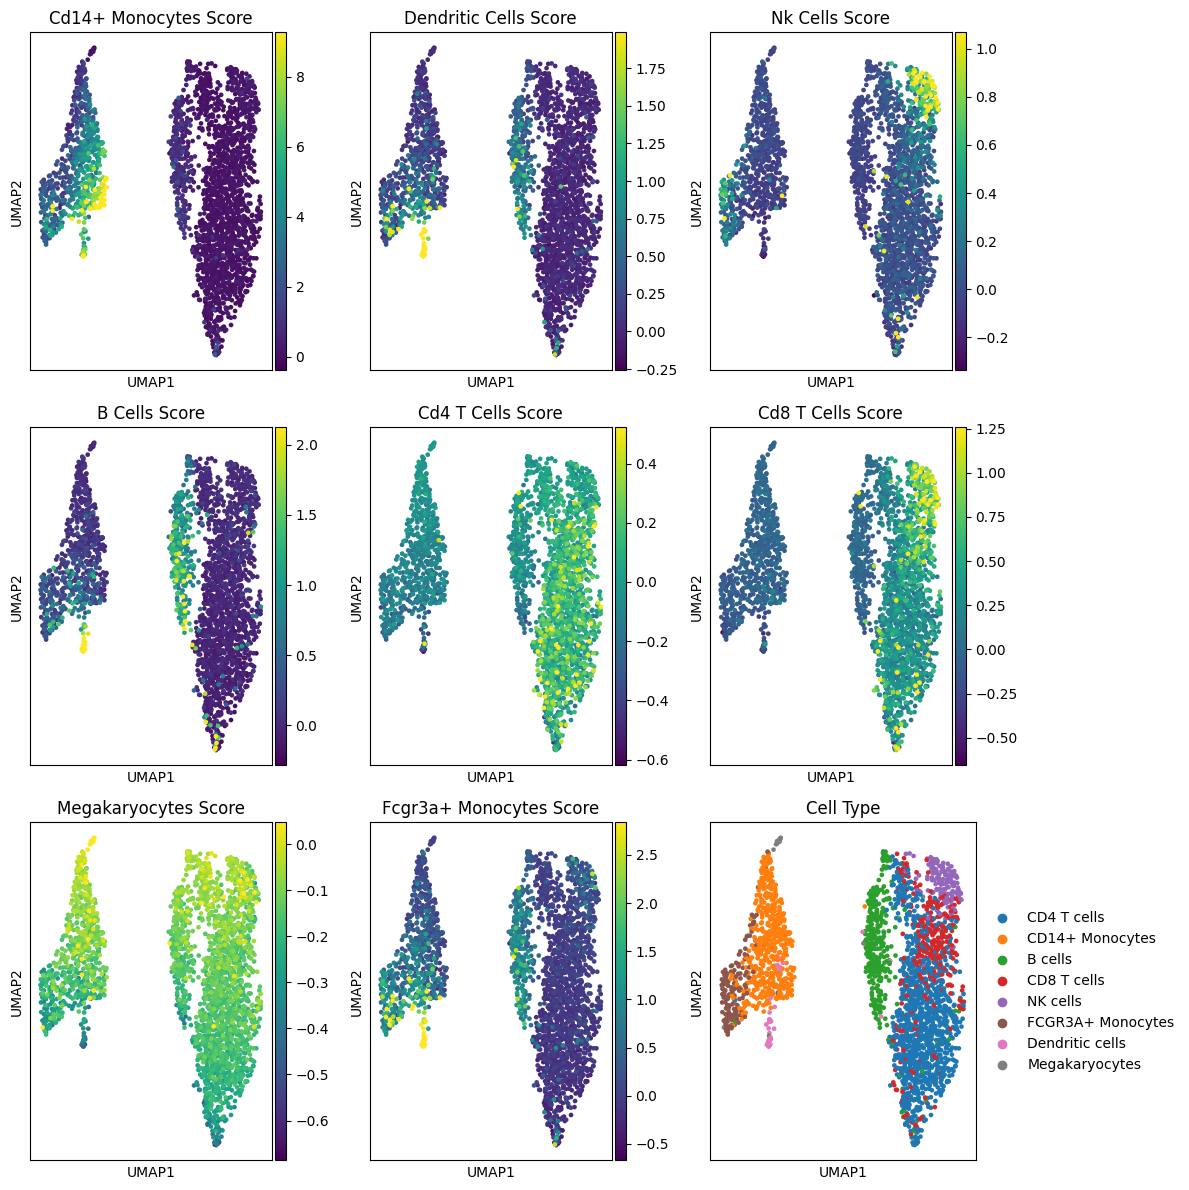

In [8]:
# Make a gene module score UMAP for adata
plots = adt.module_score_umap(adata, score_cols=score_cols + ['cell_type'])

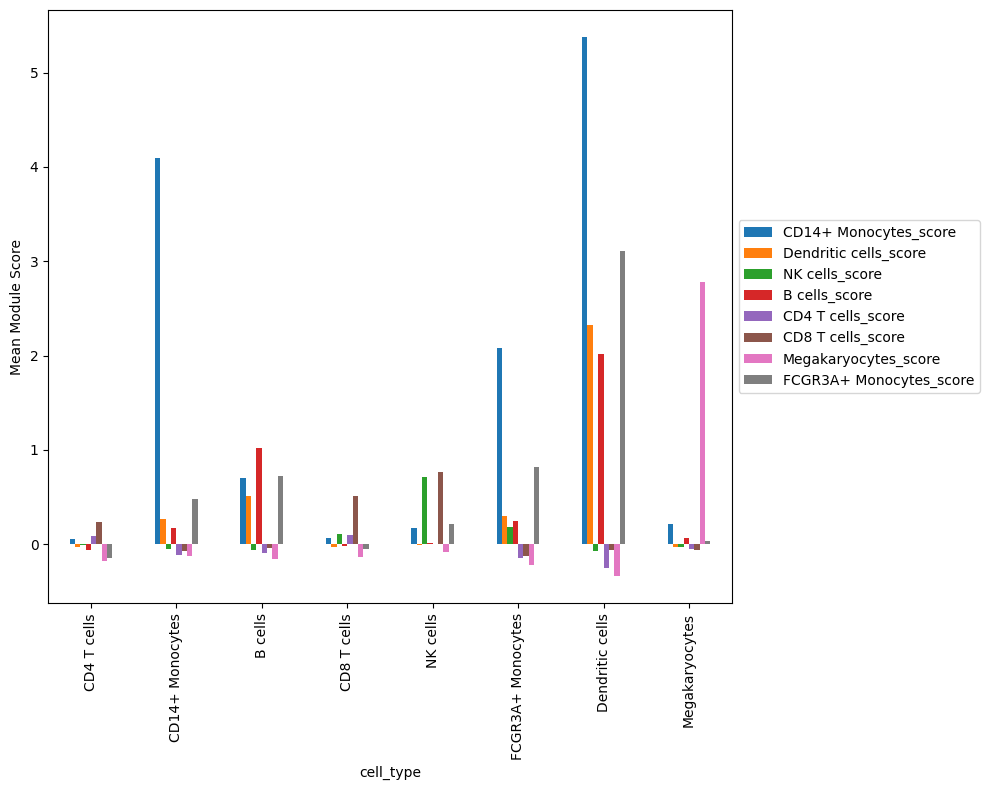

In [10]:
# As a bar plot
plots = adt.module_score_barplot(adata, group_cols='cell_type', score_cols=score_cols)